In [1]:
%matplotlib inline 
import optoanalysis
from numpy import pi

In [2]:
optoanalysis.properties["default_fig_size"] = (7, 5) # sets default fig size for optoanalysis plots

In [3]:
data = optoanalysis.load_data("testData.raw")

Loading data from testData.raw


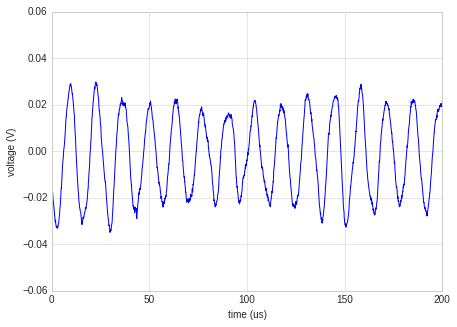

(<matplotlib.figure.Figure at 0x7f4e44c0f710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e35c31978>)

In [4]:
data.plot_time_data(timeStart=0, timeEnd=200, units='us')

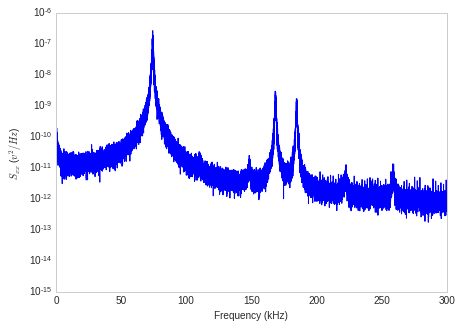

In [5]:
fig, ax = data.plot_PSD([0, 300]); # Plot PSD of loaded data

found best


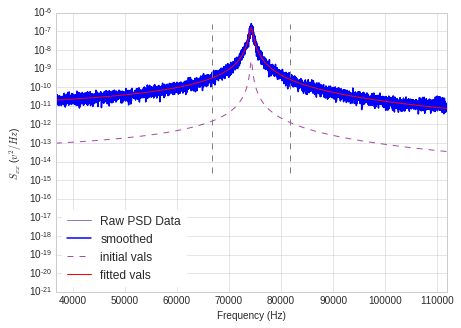



A: 548621211346.4015 +- 1.5185995850285017% 
Trap Frequency: 466605.4199560858 +- 0.014086349536225545% 
Big Gamma: 3992.3233665602356 +- 3.249713441212438% 


In [6]:
W_trap_z, A, Gamma, fig, ax = data.get_fit_auto(75e3); # fit to Z peak of loaded data and extracts the parameters A (The A parameter), W_trap_z (the trap frequency in Z) and Gamma (the damping on Z)

In [7]:
# next 3 lines are just me getting the pressure value from a file
with open("testDataPressure.dat", 'r') as file: 
    for line in file:
        pressure = float(line.split("mbar")[0])

R, M, ConvFactorZ = data.extract_parameters(pressure, 0.15) # extracts the radius of the particle, mass and conversion factor for the z degree of freedom (used to convert volts to meters of particle motion)

In [8]:
print(R, M, ConvFactorZ)

(3.2+/-0.5)e-08 (3.1+/-1.0)e-19 (1.8+/-0.6)e+05


In [9]:
F_trap_z = W_trap_z/(2*pi)

In [10]:
print(F_trap_z)

74263+/-10


filtering data


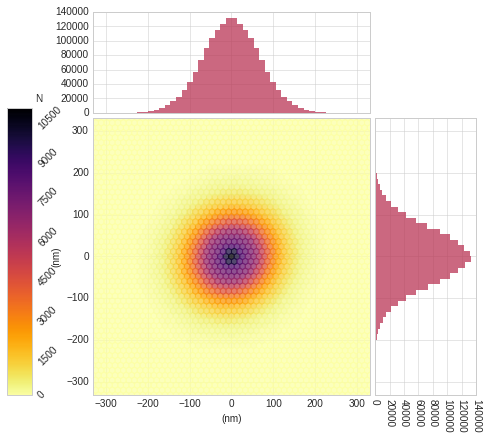

In [11]:
fig, axscatter, axhistx, axhisty, cbar = data.plot_phase_space(F_trap_z.n, ConvFactorZ, FractionOfSampleFreq=3, figsize=[7, 7]); # this filters for the z motion, calculates the phase space of this motion and plots it using the qplots library

found best


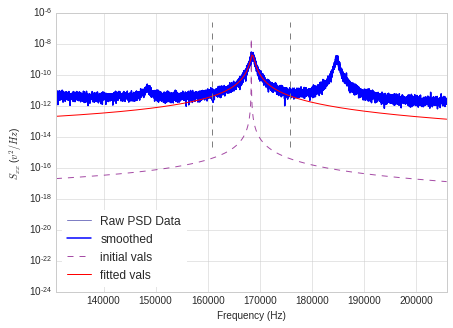



A: 41671522193.72603 +- 1.5048839857381018% 
Trap Frequency: 1059286.9112359534 +- 0.008296517428224433% 
Big Gamma: 4530.375868184959 +- 3.2509953331620234% 
found best


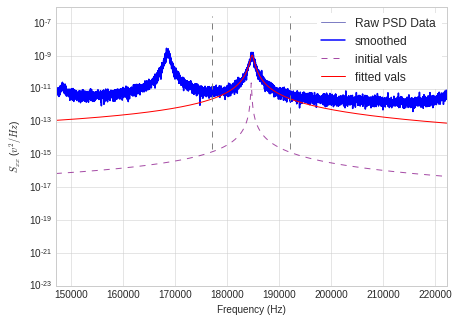



A: 29346150102.690697 +- 1.5008668421661504% 
Trap Frequency: 1161182.0446442417 +- 0.007815161493395789% 
Big Gamma: 4404.64345546352 +- 3.3146231843351837% 


In [16]:
W_trap_x, A, Gamma, fig, ax = data.get_fit_auto(160e3); # fits to the x peak
R, M, ConvFactorX = data.extract_parameters(pressure, 0.15) # extracts parameters from x peak

W_trap_y, A, Gamma, fig, ax = data.get_fit_auto(180e3); # fits to the y peak
R, M, ConvFactorY = data.extract_parameters(pressure, 0.15)# extracts parameters from y peak

In [13]:
print(ConvFactorZ, ConvFactorX, ConvFactorY) # conversion factor for z is larger than conversion factor for x and y (which have similar values) as our detection more sesitive to z than x and y

(1.8+/-0.6)e+05 (3.9+/-1.2)e+04 (3.4+/-1.1)e+04


filtering Z
filtering X
filtering Y


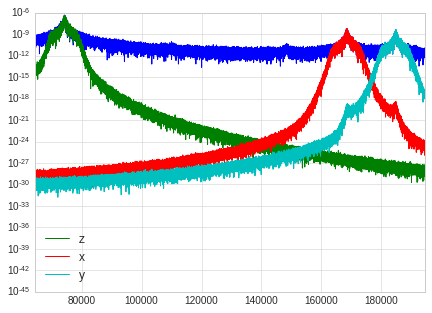

In [14]:
z, x, y, t, fig, ax = data.extract_ZXY_motion([75e3, 165e3, 180e3], 10e3, [10e3, 10e3, 10e3], subSampleFraction=3) # extracts the motion of z, x and y

This will take ~ 0.3383333333333333 minutes


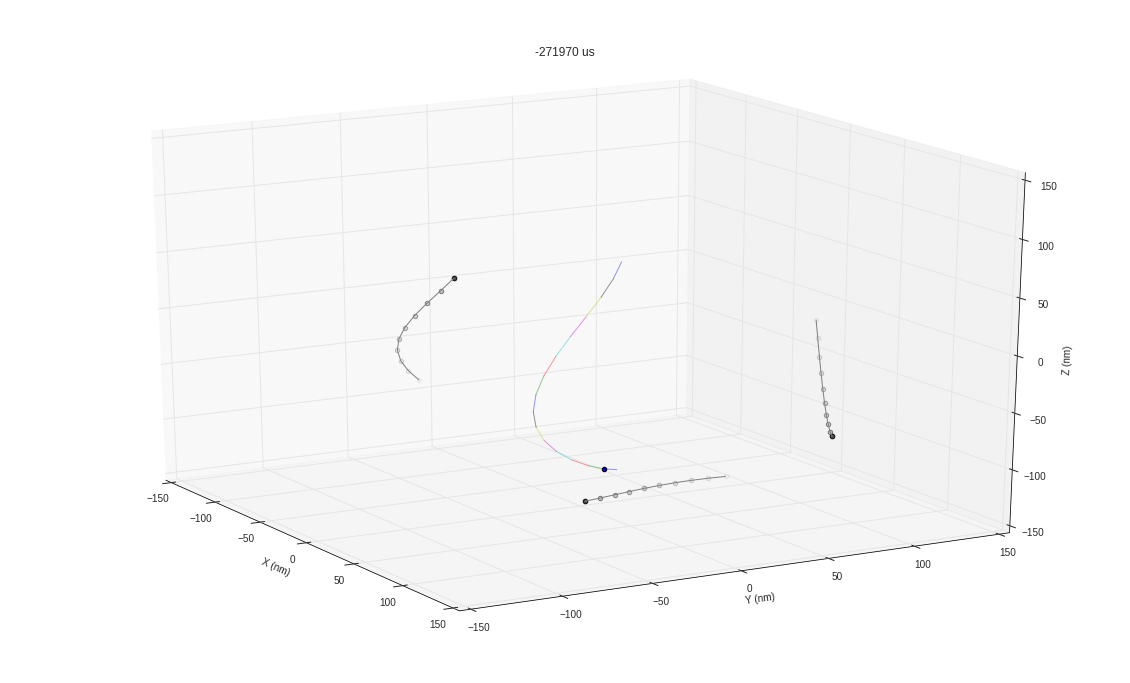

In [15]:
optoanalysis.animate(z, x, y, [ConvFactorZ.n, ConvFactorX.n, ConvFactorY.n], t, 150, timeSteps=100) # animates the motion of z, x and y